# Introduction to Coursework #2

This notebook contains some extended versions of hints and some code examples that are suppose to make it easier to proceed with certain tasks in Coursework #2.

## Virtual environments

Before you proceed onwards, remember to activate your virtual environment by typing `activate_mlp` or `source ~/mlpractical/venv/bin/activate` (or if you did the original install the "comfy way" type: `workon mlpractical`).

## Syncing the git repository

Look <a href="https://github.com/CSTR-Edinburgh/mlpractical/blob/master/gitFAQ.md">here</a> for more details. But in short, we recommend to create a separate branch for the coursework, as follows:

1. Enter the mlpractical directory `cd ~/mlpractical/repo-mlp`
2. List the branches and check which are currently active by typing: `git branch`
3. If you have followed our recommendations, you should be in the `lab5` branch, please commit your local changes to the repo index by typing:
```
git commit -am "finished lab5"
```
4. Now you can switch to `master` branch by typing: 
```
git checkout master
 ```
5. To update the repository (note, assuming master does not have any conflicts), if there are some, have a look <a href="https://github.com/CSTR-Edinburgh/mlpractical/blob/master/gitFAQ.md">here</a>
```
git pull
```
6. And now, create the new branch & switch to it by typing:
```
git checkout -b coursework2
```

# Store the intermediate results (check-pointing and pickling)

Once you have finished a  task it is a good idea to check-point your current notebook's status (logs, plots and whatever else has been stored in the notebook). By doing this, you can always revert to this state later when necessary. You can do this by going to menus `File->Save and Checkpoint` and `File->Revert to Checkpoint`.

Another good practice would be to save models and the statistics you generate to disk. You can easily do this in python by using *cPickle*, as in the following example.

```python 
import cPickle

#...
(train_stats, valid_stats) = optimiser.train(model, train_dp, valid_dp)
test_stats = optimiser.validate(model, test_dp)

#this one saves the model, you can save like this any object 
#in python, like tuples, dictionaries, lists, etc.
with open('task1_mdl.pkl','wb') as f:
    cPickle.dump(model, f)
    
#then, to load you can type 
with open('task1_mdl.pkl','r') as f:
    model2 = cPickle.load(f)

#and you can use it again (if needed) without retraining
test_stats2 = optimiser.validate(model2, test_dp)
    
```

# Notes on numpy and tensors

This is a remainder on some numpy conventions you may find useful (especially in the second part of  coursework #2, which involves the implementation of convolution and pooling layers).

Links to numpy indexing:
* [Numpy (advanced) indexing](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)
* [More on indexing of multi-dimensional arrays](http://docs.scipy.org/doc/numpy/user/basics.indexing.html)

Below we list some (potentially) useful functions - you are not expected to need them all - we just outline some (non-obvious) functionality that you may find useful. Search the numpy documentation to get precise information about them. 

* `numpy.sum` - note that the axis arguments allow to specify a sequence of axes, hence, the reduction (here sum) can be performed along arbitrary dimensions.
* `numpy.amax` - the same as with sum
* `numpy.transpose` - can specify which axes you want to get transposed in a tensor
* `numpy.argmax` - gives you the argument (index) of the maximum value in a tensor
* `numpy.flatten` - collapses the n-dimensional tensor into vector (copy)
* `numpy.ravel` - collapses the n-dimensional tensor into vector (creates a view)
* `numpy.reshape` - allows to reshape a tensor into another (valid from data perspective) tensor (matrix, vector) with a different shape (but the same number of total elements)
* `numpy.rot90(m, k)` - rotate matrix `m` by 90 degrees `k` times (counter-clockwise)
* `numpy.newaxis` - add an axis with dimension 1 (handy for keeping tensor shapes compatible with expected broadcasting)
* `numpy.rollaxis` - roll an axis in a tensor
* `slice` - allows to specify a range (can be used when indexing numpy arrays)
* `ellipsis` - allows to pick an arbitrary number of dimensions (inferred)
* `max_and_argmax` - `(mlp.layers)` - an auxiliary function we have provided to get both max and argmax of a tensor across an arbitrary axes, possibly in the format preserving tensor's original shape (this is not trivial to do using numpy *out-of-the-shelf* functionality).

The below cells contain some simple examples showing the basics of tensor manipulation in numpy (go through them if you haven't used numpy in this context before).

In [1]:
%load_ext autoreload
%load_ext cython

from mlp.dataset import MNISTDataProvider
import numpy

rng = numpy.random.RandomState([2015, 11, 11])

# we create MNISTDataProvider with 'conv_reshape' argument set to True, 
# this will give us a 4D tensor of shape
# (batch_size, num_input_channels, width, height)
# compared to standard fully connected one
# (batch_size, width*height)
batch_size = 2
mdp = MNISTDataProvider('valid', batch_size=batch_size, max_num_batches=1, randomize=False, conv_reshape=True)
x, t = mdp.next()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
(2, 1, 28, 28)
(2, 784)
True
(1, 28, 28)
(1, 28, 28)
(1, 1, 28, 28)
[[ 87.4453125]
 [ 89.5859375]]
177.031
[[[ 0.          0.          0.          0.          3.03515625  7.15234375
    6.33203125  1.9765625   1.859375    2.50390625  2.984375    3.453125
    3.6015625   3.546875    3.046875    4.171875    4.74609375  4.421875
    3.77734375  2.87109375  7.58984375  9.62109375  7.4453125   3.30859375
    0.          0.          0.          0.        ]]

 [[ 0.          0.          0.          0.          0.          5.52734375
    8.4609375   5.03515625  3.58203125  4.16015625  3.77734375  4.3125
    4.640625    4.765625    3.81640625  3.34765625  4.57421875  4.25390625
    4.0625      3.21484375  2.92578125  3.05078125  4.0390625   7.05078125
    4.98828125  0.          0.          0.        ]]]
(1, 9, 20) (1, 9, 20)


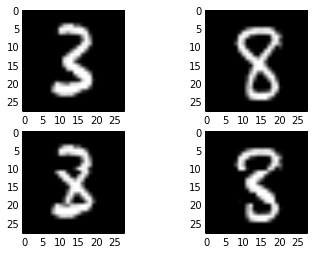

In [4]:
%pylab
%matplotlib inline
# this will print (2, 1, 28, 28) which is
# (batch_size, num_input_channels, width, height)
print x.shape
# and this the flattened version used to date (2, 784)
print x.reshape(batch_size, -1).shape

# you can pick the first image in the usual way you index numpy arrays
img1 = x[0]
# or in full notation which is equivalent (numpy by default treats single 
# indexes as selecting everything for this dimension)
img2 = x[0, :, :, :]
#this will be true
print numpy.allclose(img1, img2)

# Notice, slicing like this is collapsing the leading dimension 
# (as we picked only 0-th element), so the below will give you
# (1, 28, 28)
print img1.shape
print img2.shape

# to keep this dimension, one can use numpy.newaxis, which will add one dimension of
# size 1, as a result you get a tensor (1, 1, 28, 28) 
# one image (as expected), but with preserved ndims of the source 4D tensor 
# this can be handy as it can simplify assignments to the original tensor
img1=x[0, numpy.newaxis]
print img1.shape

#Let assume you want to get a sum of pixel intensities in each image in a mini-batch, 
#you can of course iterate over images and compute sum for each separately, but you can also:

#to get the sum of pixel for each image separately, you could write:
# (which means, sum along axis 2 and 3 together)
print numpy.sum(x, axis=(2,3))

#notice, that any of other calls would do what we want as:
#will print the total sum for all images
print numpy.sum(x)

#will print the sum along the last axes (the columns of the images)
print numpy.sum(x, axis=-1)

# finally, let us swap the 10x20 rectangle of pixels between images
# in numpy you can of course perform an arbitrary slicing and assignment
# of sub-matrices

slice_x = slice(10, 20)
slice_y = slice(5, 25)

patch1 = x[0, :, slice_x, slice_y]
patch2 = x[1, :, slice_x, slice_y]
print patch1.shape, patch1.shape

xc = numpy.array(x) #this will make a copy of x
xc[0, :, slice_x, slice_y] = patch2
xc[1, :, slice_x, slice_y] = patch1

fig, ax = plt.subplots(2,2)
ax[0, 0].imshow(x[0,0], cmap=cm.Greys_r)
ax[0, 1].imshow(x[1,0], cmap=cm.Greys_r)
ax[1, 0].imshow(xc[0,0], cmap=cm.Greys_r)
ax[1, 1].imshow(xc[1,0], cmap=cm.Greys_r)


# Verifying the gradients

One can numerically compute the gradient using the [finite differences](https://en.wikipedia.org/wiki/Finite_difference) method, that is, perturb the input arguments by some small value and then measure how this affects the function change:

$
f(x) = \frac{f(x+\epsilon) - f(x)}{\epsilon}
$

Because $\epsilon$ is usually very small (1e-4 or smaller) it is recommended (due to finite precision of numerical machines) to use the centred variant (which is implemented in mlp.utils):

$
f(x) = \frac{f(x+\epsilon) - f(x-\epsilon)}{2\epsilon}
$

The numerical gradient gives a good intuition if something is wrong. But take care, since one can easily find ill-conditioned cases where this test might fail - either due to numerical precision when gradients get really small, or other because of issues like discontinuities in transfer functions (ReLU, Maxout) where perturbing the inputs might cause the piecwise component to cross "the border". For instance, for ReLU assume $f(x) < 0$ by a some small margin in argument $x$ and the gradient is correctly set to 0. However, the finite difference quotient rule with some $\epsilon$ such $f(x+\epsilon) > 0$  will give a non-zero numerical gradient. Anyway, this method remains very useful in verifying whether the implemented forward and backward pasees are mutually correct.

Below, you can find some examples on how one can use it, first for an arbitrary function and then short snippet on how to check the gradient backpropagated through layer.

In [14]:
%autoreload

import numpy
from mlp.utils import verify_gradient

rng = numpy.random.RandomState([2015, 11, 11])

#simple example
def f1_correct_grad(x, **kwargs):
    fval = x**2
    fgrad = 2*x
    return numpy.sum(fval), fgrad

def f1_incorrect_grad(x, **kwargs):
    fval = x**2
    fgrad = x
    return numpy.sum(fval), fgrad

x = rng.uniform(-5, 5, (10,))

#this one should be OK
print verify_gradient(f=f1_correct_grad, x=x)
# this one should raise an exception, as the computed gradient is wrong
print verify_gradient(f=f1_incorrect_grad, x=x)

print verify_layer_gradient(Sigmoid)

NameError: name 'fl_correct_grad' is not defined

You can also check the backprop implementation in the layer. Notice, it **does not** necessarily check whether your layer implementation is correct but rather if the gradient computation is correct, given the forward pass computation. If you get the forward pass wrong, and somehow got the gradients right w.r.t what the forward pass is computing, the below check will not capture it (obviously).  Contrary to normal scenraio where 32 floating point precision is sufficient, when checking gradients please make sure 64bit precision is used (or tune the tolerance).

In [15]:
%autoreload

from mlp.layers import Sigmoid
from mlp.utils import verify_layer_gradient

# keep it small, however, one can test it on some subset of MNIST
idim = 10
odim = 5

x = rng.uniform(-2, 2, (20, idim))
s = Sigmoid(idim=idim, odim=odim, rng=rng)
verify_layer_gradient(s, x)

True

# Speeding up the code

Convolution can be accelerated in many ways, one of them is the use of *Cython* to write crucial bits in python (the one that involve heavy loop usage). You can speed up your code by:

* Using numpy as much as possible (which will use highly optimised looping, and possibly a form of BLAS-implemented paralleism where possible)
* Applying standard tricks to convolution (they boil down to more efficent use of BLAS routines (above) by loop unrolling - fewer operations on larger matrices, rather than more on smaller)
* Speeding up the code by compiling pythonic c-functions (cython)


## Using Cython for the crucial bottleneck pieces

Cython will compile them to C and the code should be comparable in terms of efficiency to numpy using similar operations in numpy. Of course, one can only rely on numpy. Slicing numpy across many dimensions gets much more complicated than working with vectors and matrices and we do understand that this can be confusing. Hence, we allow the basic implementation (with any penalty or preference from our side) to be based on embedded loops (which is perhaps much easier to comprehend and debug).

Below we give some example cython code for the matrix-matrix dot function from the second tutorial so that you can see the basic differences and compare the obtained speeds. They give you all the necessary patterns needed to implement naive (reasonably efficient) convolution. If you use native python, rather than Cython, then naive looping will be *very* slow.

Some tutorials:
 * [Cython, language basics](http://docs.cython.org/src/userguide/language_basics.html#language-basics)
 * [Cython, basic tutorial](http://docs.cython.org/src/tutorial/cython_tutorial.html)
 * [Cython in ipython notebooks](http://docs.cython.org/src/quickstart/build.html)
 * [A tutorial on how to optimise the cython code](http://docs.cython.org/src/tutorial/numpy.html) (includes a working example which is actually simple convolution code, do not use it `as is`)
 

Before you proceed, check that you have installed `cython` (it should be installed with scipy). If the below imports do not work, then - staying in the activated virtual environment - type:
 
 ```
 pip install cython
 ```

In [18]:
#native pythonic implementation (as in the second tutorial, rather slow...)
def my_dot_mat_mat(x, W):
    I = x.shape[0]
    J = x.shape[1]
    K = W.shape[1]
    assert (J == W.shape[0]), (
        "Number of columns in x expected to "
        " to be the same as rows in W, got"
        " %i != %i" % (J, W.shape[0])
    )
    #allocate the output container
    y = numpy.zeros((I, K))
    
    #implement matrix-matrix inner product here
    for i in xrange(0, I):
        for k in xrange(0, K):
            for j in xrange(0, J):
                y[i, k] += x[i, j] * W[j,k]
                
    return y

In [19]:
%%cython
# this shows an example on how to build cython accelerated
# function than one can later use a standard python function

#notice, you need to specify all the imports again (so they are
#available in the compiled verions of the code, when executed)
import numpy
cimport numpy

def my_dot_mat_mat_cython(numpy.ndarray x, numpy.ndarray W):
    cdef int I = x.shape[0]
    cdef int J = x.shape[1]
    cdef int K = W.shape[1]
    
    assert (J == W.shape[0]), (
        "Number of columns in x expected to "
        " to be the same as rows in W, got"
        " %i != %i" % (J, W.shape[0])
    )
    
    #allocate the output container and other variables
    cdef numpy.ndarray y = numpy.zeros((I, K))
    cdef int i, k, j
    
    #implement matrix-matrix inner product here
    for i in xrange(0, I):
        for k in xrange(0, K):
            for j in xrange(0, J):
                y[i, k] += x[i, j] * W[j,k]
                
    return y

In [24]:
%%cython
# this shows an example on how to build cython accelerated
# function than one can later call as usual from python

#the optimisation relies on making an explicit c-buffers for data, 
#hence they can be accesses much quicker, notice, this is where 
#the real gain in speed comes from really

#you need to specify all the imports again (so they are
#available in the compiled verions of the code)
import numpy
cimport numpy

#we specify the types our function is supposed to
#be compiled with, float32 is sufficient for neural nets
#you can use defalut 64bit precision if you want
DTYPE = numpy.float32
ctypedef numpy.float32_t DTYPE_t


def my_dot_mat_mat_cython_optimised(numpy.ndarray[DTYPE_t, ndim=2] x, 
                                    numpy.ndarray[DTYPE_t, ndim=2] W):
    
    cdef int I = x.shape[0]
    cdef int J = x.shape[1]
    cdef int K = W.shape[1]
    
    assert (J == W.shape[0]), (
        "Number of columns in x expected to "
        " to be the same as rows in W, got"
        " %i != %i" % (J, W.shape[0])
    )
    
    #allocate the output container and other variables, notice, when allocating
    #y we specify its type both for the buffer but also in numpy.zeros() function
    cdef numpy.ndarray[DTYPE_t, ndim=2] y = numpy.zeros((I, K), dtype=DTYPE)
    cdef int i, k, j
    
    #implement matrix-matrix inner product here
    for i in xrange(0, I):
        for k in xrange(0, K):
            for j in xrange(0, J):
                y[i, k] += x[i, j] * W[j,k]
                
    return y

You can optimise the code further as in the [linked](http://docs.cython.org/src/tutorial/numpy.html) tutorial. However, the above example seems to be a reasonable compromise for developing the code - it gives reasonably accelerated code, with all the checks one may expect to be existent under development (checking bounds of indices, wheter types of variables match, tracking overflows etc.). Look [here](http://docs.cython.org/src/reference/compilation.html) for more optimisation decorators that one can use to speed things up.

Below we do some benchmarks on each of the above functions. Notice the huge speed-up in going from non-optimised cython code to an optimised one (on my machine, 643ms -> 6.35ms - this is 2 orders of magnitude!). It is still around two times slower than the BLAS accelerated numpy.dot routine (the non-cached result is around 3.3ms). But our method just benchmarks the dot product, an operation that has been optimised incredibly well in numerical libraries. Of course, we **do not** want you to use this code for dot products and you should rely on functions provided by numpy (whenever reasonably possible). The above code was just given as an example how to produce much more efficient code with very small effort. In many scenarios (convolution is an example) the code is more complex than a single dot product and some looping is necessary anyway, especially when dealing with multi-dimensional tensors where atomic operations using direct loop-based indexing may be much easier to comprehend (and debug) than a direct multi-dimensional manipulation of numpy tensors.

In [25]:
#generate bit bigger matrices, to better evaluate timings

# note, we explicitly cast them to float32 as it was the type cython
# functions were compiled with, float32 is more than sufficient precision
# for neural networks
x = rng.uniform(-1, 1, (10, 1000)).astype(numpy.float32)
W = rng.uniform(-0.3, 0.2, (1000, 100)).astype(numpy.float32)

In [27]:
print 'native pyton my_dot timings:'
%timeit -n10 my_dot_mat_mat(x, W)

native pyton my_dot timings:
10 loops, best of 3: 1.79 s per loop


In [28]:
print 'cython my_dot timings:'
%timeit -n10 my_dot_mat_mat_cython(x, W)

cython my_dot timings:
10 loops, best of 3: 1.46 s per loop


In [29]:
print 'optimised cython my_dot timings:'
%timeit -n10 my_dot_mat_mat_cython_optimised(x, W)

optimised cython my_dot timings:
10 loops, best of 3: 3.58 ms per loop


In [30]:
print 'numpy.dot timings (with BLAS):'
%timeit -n10 numpy.dot(x, W)

numpy.dot timings (with BLAS):
10 loops, best of 3: 138 µs per loop
